In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Function that returns set of samples with a given size and number 
def create_samples(random_start=0,num_of_samples=1,size=1000):

    datasets = []
    for i in range(random_start,random_start+num_of_samples):
        # Set the seed for reproducibility
        np.random.seed(i)

        # Set the mean and standard deviation for the normal distribution
        mean = 100
        std_dev = 10

        # Generate an array of normally distributed random numbers with noise
        random_array = np.random.normal(mean, std_dev, size) #+ np.random.normal(0, 0.1, array_size)
        datasets.append(random_array)

    return datasets

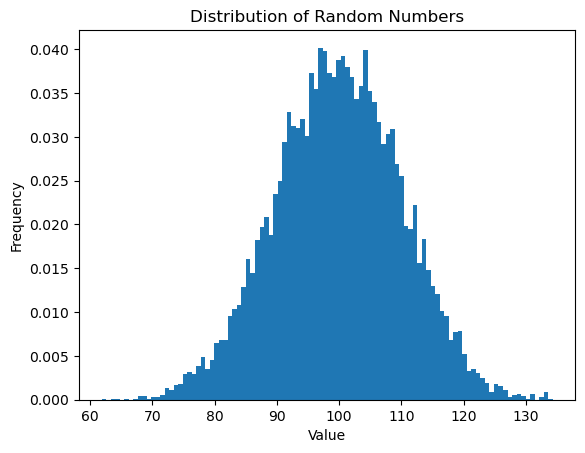

In [3]:
#Create samples and plot histogram
samples = create_samples(random_start=1000,num_of_samples=100000,size=10000)

plt.hist(samples[0], bins=100, density=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Random Numbers')
plt.show()

In [4]:
# Simulates: look first given percent then stop looking and leap the first best
def no_information_simulate(samples,stop_perc=37):
    positives = 0 
    for sample in samples:
        look_size = np.floor(len(sample) * stop_perc / 100).astype(int)
        look_max = np.max(sample[0:look_size])
        leap_max = np.max(sample[look_size:len(sample)])

        # if best in look part, it mean we missed
        if(look_max>leap_max):
            continue
        else:
            for instance in sample[look_size:len(sample)]:
                if(instance>look_max):
                    if(instance==leap_max):
                        positives=positives+1
                    break
    
    accuracy = positives / len(samples)
    print("Win rate for",stop_perc,"% is:", accuracy )
    return accuracy

In [5]:
# Where to stop? Get Accuracies for different stop %
scores=[]
for i in range(1,100):
    acc = no_information_simulate(samples,i)
    scores.append(acc)

Win rate for 1 % is: 0.04633
Win rate for 2 % is: 0.07912
Win rate for 3 % is: 0.10683
Win rate for 4 % is: 0.13096
Win rate for 5 % is: 0.15146
Win rate for 6 % is: 0.17068
Win rate for 7 % is: 0.18828
Win rate for 8 % is: 0.20304
Win rate for 9 % is: 0.21739
Win rate for 10 % is: 0.232
Win rate for 11 % is: 0.24528
Win rate for 12 % is: 0.25659
Win rate for 13 % is: 0.26753
Win rate for 14 % is: 0.27791
Win rate for 15 % is: 0.2874
Win rate for 16 % is: 0.29569
Win rate for 17 % is: 0.30281
Win rate for 18 % is: 0.31041
Win rate for 19 % is: 0.31711
Win rate for 20 % is: 0.32289
Win rate for 21 % is: 0.32898
Win rate for 22 % is: 0.33378
Win rate for 23 % is: 0.33905
Win rate for 24 % is: 0.3423
Win rate for 25 % is: 0.34568
Win rate for 26 % is: 0.34949
Win rate for 27 % is: 0.35296
Win rate for 28 % is: 0.35583
Win rate for 29 % is: 0.35784
Win rate for 30 % is: 0.35923
Win rate for 31 % is: 0.3615
Win rate for 32 % is: 0.36296
Win rate for 33 % is: 0.36409
Win rate for 34 % is: 0.

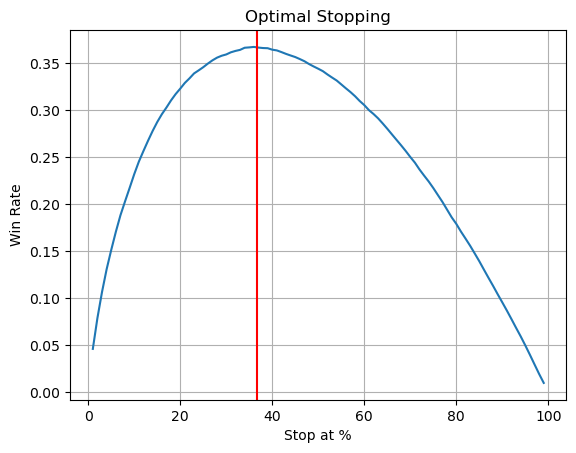

In [6]:
#Plot the results for different stops
x = list(range(1,100))
y = scores
plt.plot(x, y)
plt.axvline(100/np.exp(1), color='red') 
# plt.axhline(1/np.exp(1), color='red') 
#set title and x, y - axes labels
plt.title('Optimal Stopping')
plt.xlabel('Stop at %')
plt.ylabel('Win Rate')
plt.grid()

# Experiments on Real Data (Dutch Language Score)
# https://zenodo.org/record/2863533#.ZDGJR3ZBxmN

In [7]:
stex = pd.read_csv('/input/stex.csv',encoding='latin-1')
stex["Speaking"].describe()

count    50235.000000
mean       517.622275
std         37.917385
min        270.000000
25%        494.000000
50%        516.000000
75%        540.000000
max        685.000000
Name: Speaking, dtype: float64

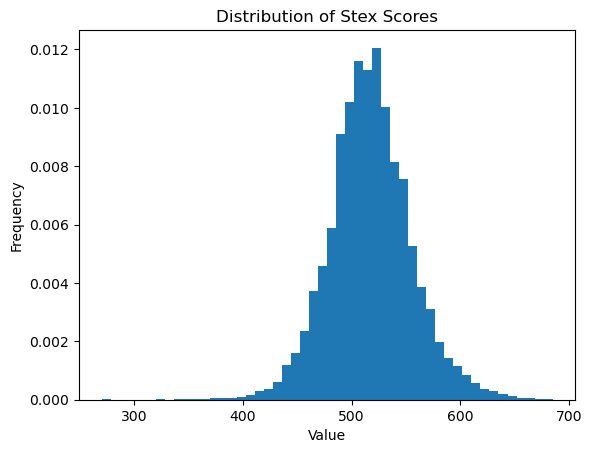

In [8]:
plt.hist(stex["Speaking"], bins=50, density=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Stex Scores')
plt.show()

In [9]:
def select_samples(population, random_start=0, num_of_samples=1, size=1000):

    datasets = []
    for i in range(random_start,random_start+num_of_samples):
        # Set the seed for reproducibility
        np.random.seed(i)

        sample = np.random.choice(population, size, replace=False)
        np.random.shuffle(sample)
        datasets.append(sample)

    return datasets

In [10]:
stex_samples = select_samples(population=stex["Speaking"],random_start=0,num_of_samples=10000,size=10000)

In [11]:
# Where to stop? Get Accuracies for different stop %
scores=[]
for i in range(1,100):
    acc = no_information_simulate(stex_samples,i)
    scores.append(acc)

Win rate for 1 % is: 0.0496
Win rate for 2 % is: 0.0869
Win rate for 3 % is: 0.1174
Win rate for 4 % is: 0.1406
Win rate for 5 % is: 0.1619
Win rate for 6 % is: 0.1854
Win rate for 7 % is: 0.2041
Win rate for 8 % is: 0.2211
Win rate for 9 % is: 0.2348
Win rate for 10 % is: 0.2514
Win rate for 11 % is: 0.2644
Win rate for 12 % is: 0.278
Win rate for 13 % is: 0.2898
Win rate for 14 % is: 0.3007
Win rate for 15 % is: 0.3135
Win rate for 16 % is: 0.3214
Win rate for 17 % is: 0.3298
Win rate for 18 % is: 0.3383
Win rate for 19 % is: 0.3453
Win rate for 20 % is: 0.3478
Win rate for 21 % is: 0.3538
Win rate for 22 % is: 0.3581
Win rate for 23 % is: 0.362
Win rate for 24 % is: 0.3656
Win rate for 25 % is: 0.3685
Win rate for 26 % is: 0.3728
Win rate for 27 % is: 0.374
Win rate for 28 % is: 0.3752
Win rate for 29 % is: 0.3755
Win rate for 30 % is: 0.3768
Win rate for 31 % is: 0.3778
Win rate for 32 % is: 0.3781
Win rate for 33 % is: 0.3792
Win rate for 34 % is: 0.38
Win rate for 35 % is: 0.3804

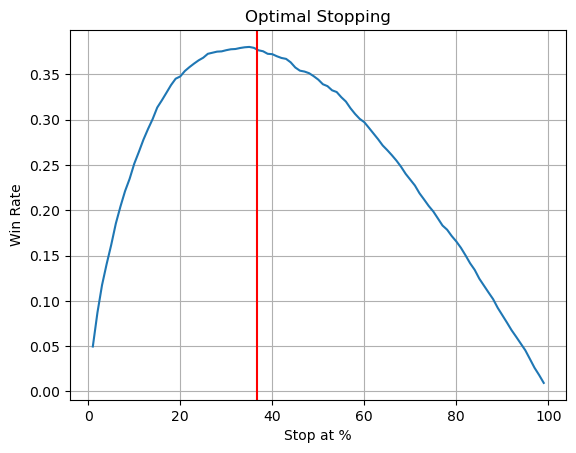

In [12]:
#Plot 
x = list(range(1,100))
y = scores
plt.plot(x, y)
plt.axvline(100/np.exp(1), color='red') 
# plt.axhline(1/np.exp(1), color='red') 
#set title and x, y - axes labels
plt.title('Optimal Stopping')
plt.xlabel('Stop at %')
plt.ylabel('Win Rate')
plt.grid()